#### Assignment 3 : Assignment on Classification technique

 1. Name    : Om Mapari
 2. class   : TE 10 (M-10)
 3. Roll No.: 33245

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
data = pd.read_csv("Admission_Predict.csv")

In [105]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [106]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [107]:
data.shape

(400, 9)

In [108]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [109]:
data.drop("Serial No.",axis=1,inplace=True)

In [110]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [111]:
data["Chance of Admit "]=data["Chance of Admit "].apply(lambda x: 1 if x>0.5 else 0)

In [112]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,1


In [113]:
# Familiarizing with data

print("Missing values:\n")
data.isnull().sum()

Missing values:



GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

From this we can come to know that there is no missing value in dataset.

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


In [115]:
# Visualizing the data

data_admit = data[data['Chance of Admit ']==1]
data_non_admit = data[data['Chance of Admit ']==0]
print("Admitted count       : " ,data_admit.shape[0])
print("Non - Admitted count : " ,data_non_admit.shape[0])

Admitted count       :  365
Non - Admitted count :  35


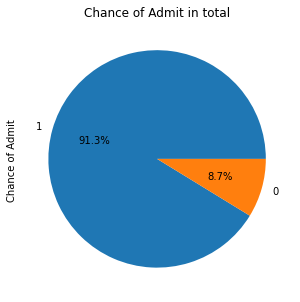

In [129]:
data['Chance of Admit '].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("Chance of Admit in total")
plt.show()


In [117]:
#highest GRE score
print("maximum GRE Score : ",data['GRE Score'].max())
#lowest GRE score
print("minimum GRE Score : ",data['GRE Score'].min())

maximum GRE Score :  340
minimum GRE Score :  290


In [118]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,1


In [119]:
# Splitting of Dataset
X= data.drop("Chance of Admit ",axis =1 )
y= data["Chance of Admit "] # depen

In [121]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

# Shape of train Test Split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(320, 7) (320,)
(80, 7) (80,)


In [122]:
# Model Training and Testing

# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier


# instantiate the model 
tree = DecisionTreeClassifier()

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [123]:
# predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)


print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 0.863


In [131]:
prediction = tree.predict(X_test)
new_data = X_test
new_data["Predicted_data"] = prediction
new_data["Actual_data"] = y_test
new_data.sort_index()

C:\Users\mapar\AppData\Local\Temp/ipykernel_142836/1071235256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Predicted_data"] = prediction
C:\Users\mapar\AppData\Local\Temp/ipykernel_142836/1071235256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Actual_data"] = y_test


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Predicted_data,Actual_data
0,337,118,4,4.5,4.5,9.65,1,1,1
5,330,115,5,4.5,3.0,9.34,1,1,1
9,323,108,3,3.5,3.0,8.60,0,1,0
15,314,105,3,3.5,2.5,8.30,0,1,1
22,328,116,5,5.0,5.0,9.50,1,1,1
...,...,...,...,...,...,...,...,...,...
388,296,97,2,1.5,2.0,7.80,0,1,0
391,318,106,3,2.0,3.0,8.65,0,1,1
394,329,111,4,4.5,4.0,9.23,1,1,1
395,324,110,3,3.5,3.5,9.04,1,1,1


In [125]:
from sklearn.metrics import classification_report
# computing the classification report of the model

print(classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.92      0.93      0.92        70

    accuracy                           0.86        80
   macro avg       0.68      0.66      0.67        80
weighted avg       0.86      0.86      0.86        80



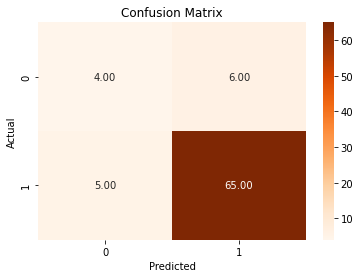

In [126]:
# visualization of Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_tree)

sns.heatmap(cm, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);